# Street network analysis

Graph analysis offers three modes, of which the first two are used within `momepy`:
- node-based
    - value per node
- edge-based
    - value per edge
- network-based
    - single value per network

In [1]:
import matplotlib.pyplot as plt
import momepy
import osmnx as ox

In this notebook, we will look at Písek, Czechia. We retrieve its network from OSM and convert it to a GeoDataFrame:

In [12]:
streets_graph = ox.graph_from_place("Pisek, Czechia", network_type="drive")
streets_graph = ox.projection.project_graph(streets_graph)

streets = ox.graph_to_gdfs(
    ox.convert.to_undirected(streets_graph),
    nodes=False,
    edges=True,
    node_geometry=False,
    fill_edge_geometry=True,
)

/Users/martin/miniforge3/envs/momepy/lib/python3.11/site-packages/osmnx/graph.py:392: FutureWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  polygon = gdf_place["geometry"].unary_union


**Note:** See the detailed explanation of these steps in the [centrality notebook](centrality.ipynb).

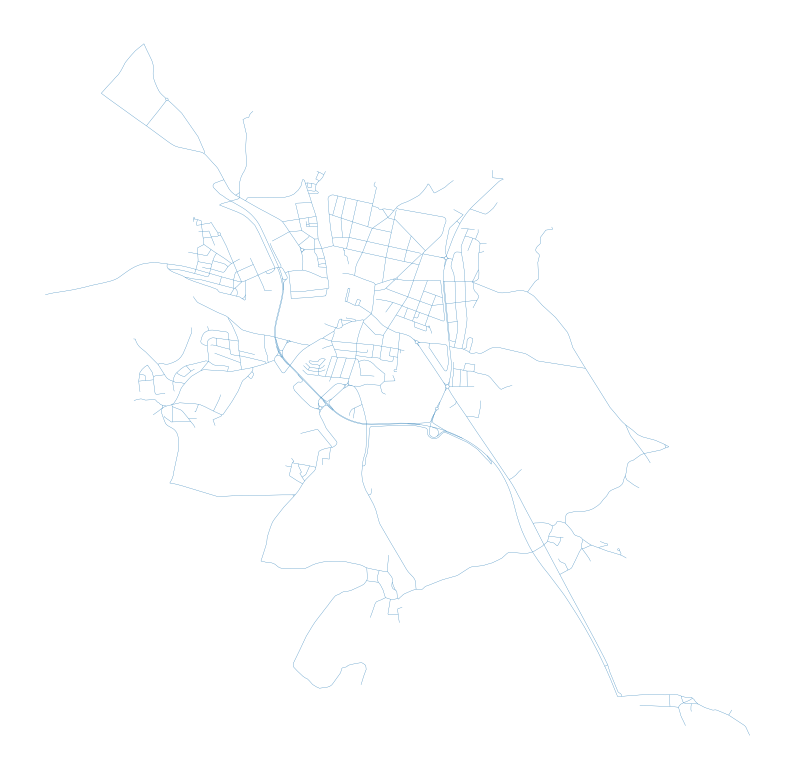

In [3]:
f, ax = plt.subplots(figsize=(10, 10))
streets.plot(ax=ax, linewidth=0.2)
ax.set_axis_off()
plt.show()

We can generate a networkX.MultiGraph, which is used within momepy for network analysis, using `gdf_to_nx`.

In [4]:
graph = momepy.gdf_to_nx(streets)

## Node-based analysis

Once we have the graph, we can use momepy functions, like the one measuring clustering:

In [5]:
graph = momepy.clustering(graph, name="clustering")

### Using sub-graph

Momepy includes local characters measured on the network within a certain radius from each node, like meshedness. The function will generate `ego_graph` for each node so that it might take a while for more extensive networks. Radius can be defined topologically:

In [6]:
graph = momepy.meshedness(graph, radius=5, name="meshedness")

  0%|          | 0/595 [00:00<?, ?it/s]

Or metrically, using distance which has been saved as an edge argument by `gdf_to_nx` (or any other weight).

In [7]:
graph = momepy.meshedness(
    graph, radius=400, name="meshedness400", distance="mm_len"
)

  0%|          | 0/595 [00:00<?, ?it/s]

Once we have finished the graph-based analysis, we can go back to `GeoPandas`. In this notebook, we are interested in nodes only:

In [8]:
nodes = momepy.nx_to_gdf(graph, points=True, lines=False, spatial_weights=False)

Now we can plot our results in a standard way, or link them to other elements (using `get_node_id`).

Clustering:

/Users/martin/miniforge3/envs/momepy/lib/python3.11/site-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 3.
  self.bins = quantile(y, k=k)


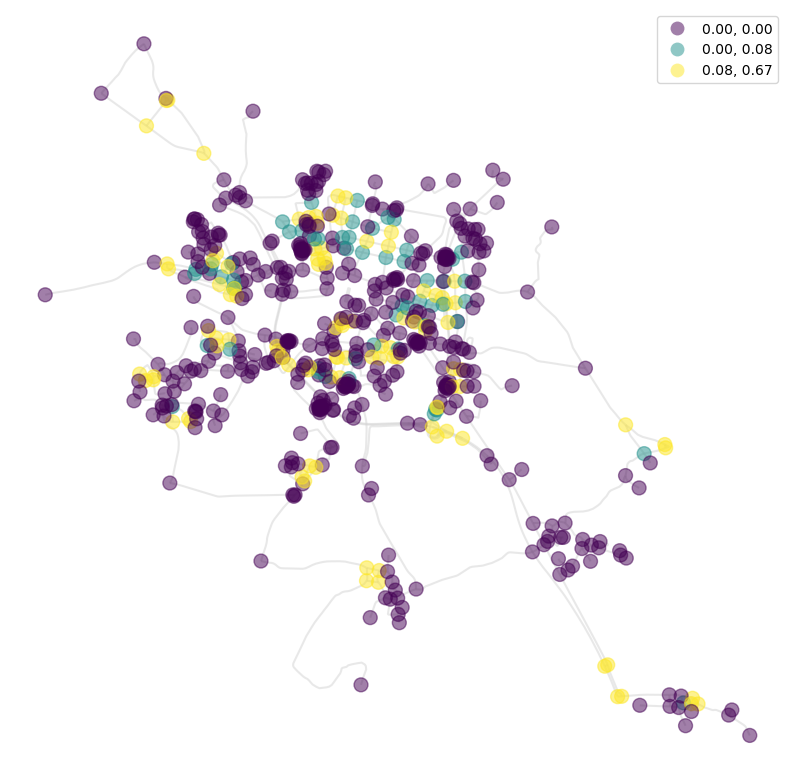

In [9]:
f, ax = plt.subplots(figsize=(10, 10))
nodes.plot(
    ax=ax,
    column="clustering",
    markersize=100,
    legend=True,
    cmap="viridis",
    scheme="quantiles",
    alpha=0.5,
    zorder=2,
)
streets.plot(ax=ax, color="lightgrey", alpha=0.5, zorder=1)
ax.set_axis_off()
plt.show()

Meshedness based on topological distance:

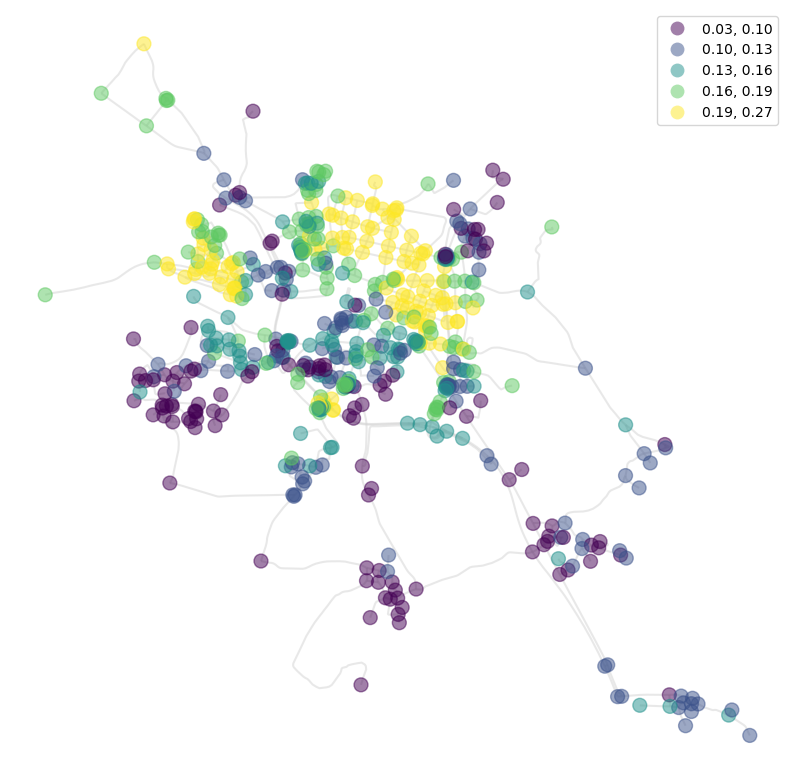

In [10]:
f, ax = plt.subplots(figsize=(10, 10))
nodes.plot(
    ax=ax,
    column="meshedness",
    markersize=100,
    legend=True,
    cmap="viridis",
    alpha=0.5,
    zorder=2,
    scheme="quantiles",
)
streets.plot(ax=ax, color="lightgrey", alpha=0.5, zorder=1)
ax.set_axis_off()
plt.show()

And meshedness based on 400 metres:

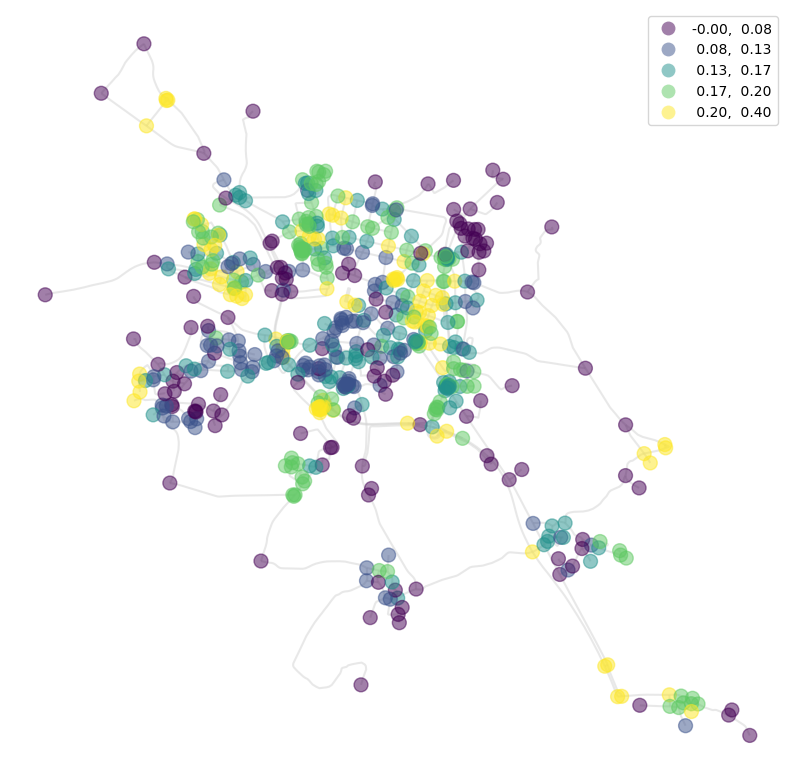

In [11]:
f, ax = plt.subplots(figsize=(10, 10))
nodes.plot(
    ax=ax,
    column="meshedness400",
    markersize=100,
    legend=True,
    cmap="viridis",
    alpha=0.5,
    zorder=2,
    scheme="quantiles",
)
streets.plot(ax=ax, color="lightgrey", alpha=0.5, zorder=1)
ax.set_axis_off()
plt.show()